<a href="https://colab.research.google.com/github/ShreyaskarSingh/ML/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import scipy.stats as stats
import datetime
import warnings
warnings.filterwarnings('ignore')



In [86]:
training_data = pd.read_csv("train.csv")
testing_data = pd.read_csv("test.csv")

In [108]:
data = pd.read_csv("train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [87]:
training_data.isnull().mean()      # check the percentage of missing values per variable

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

Text(0.5, 0, 'Age')

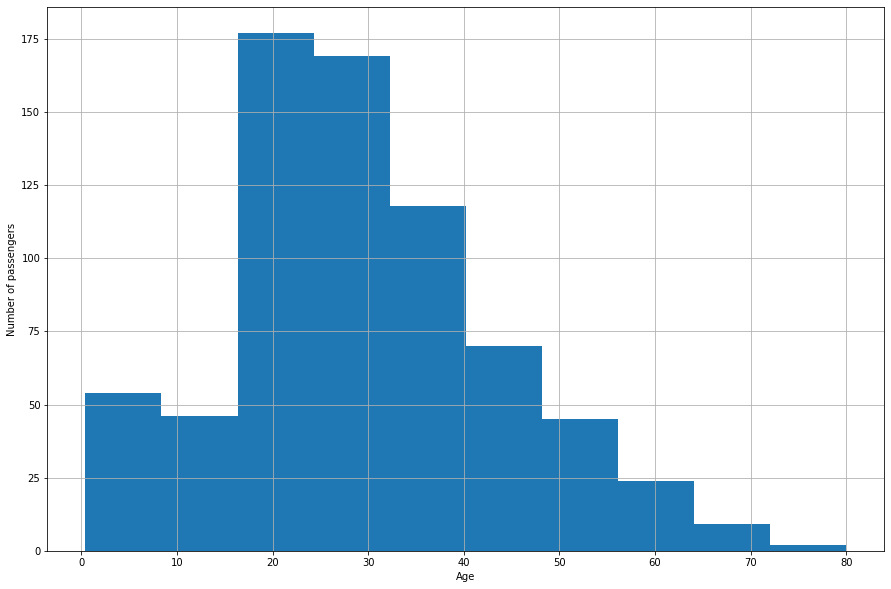

In [88]:
plt.figure(figsize=(15,10))
fig = training_data.Age.hist(bins=10)
fig.set_ylabel('Number of passengers')
fig.set_xlabel('Age')

In [89]:
training_data['Age'].fillna(training_data['Age'].median(), inplace = True)
testing_data['Age'].fillna(testing_data['Age'].median(), inplace=True)

In [90]:
testing_data["Sex"]=pd.get_dummies(testing_data["Sex"])
training_data["Sex"]=pd.get_dummies(training_data["Sex"])

In [91]:
training_data['Age'].isnull().sum() # checking for missing values in Age Column

0

In [92]:
training_data['Fare'].isnull().sum()    # checking for missing values in Fare column

0

In [93]:
combine=[training_data,testing_data]
for dataset in combine:
  dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(training_data['Title'], training_data['Sex'])

for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [94]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [95]:
training_data['Age_bin'] = pd.cut(training_data['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])
testing_data['Age_bin'] = pd.cut(testing_data['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])

In [96]:
training_data['Fare_bin'] = pd.cut(training_data['Fare'], bins=[0,7.91,14.45,31,120], labels=['Low_fare','median_fare','Average_fare','high_fare'])
testing_data['Fare_bin'] = pd.cut(testing_data['Fare'], bins=[0,7.91,14.45,31,120], labels=['Low_fare','median_fare','Average_fare','high_fare'])


In [97]:
training_data = pd.get_dummies(training_data, columns = ["Age_bin","Embarked"],prefix=["Age_type","Em_type"])

In [98]:
training_data = pd.get_dummies(training_data, columns = ["Fare_bin"],prefix=["Fare_type"])
testing_data = pd.get_dummies(testing_data, columns = ["Fare_bin"],prefix=["Fare_type"])

In [105]:
training_data.head()

,Survived,Pclass,Sex,SibSp,Parch,Title,Age_type_Children,Age_type_Teenage,Age_type_Adult,Age_type_Elder,Em_type_C,Em_type_Q,Em_type_S,Fare_type_Low_fare,Fare_type_median_fare,Fare_type_Average_fare,Fare_type_high_fare
0,0,3,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0
1,1,1,1,1,0,3,0,0,1,0,1,0,0,0,0,0,1
2,1,3,1,0,0,2,0,0,1,0,0,0,1,0,1,0,0
3,1,1,1,1,0,3,0,0,1,0,0,0,1,0,0,0,1
4,0,3,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0


In [100]:
training_data = training_data.drop(['Name','PassengerId','Cabin','Ticket'], axis=1)
testing_data = testing_data.drop(['Name','PassengerId','Cabin','Ticket'], axis=1)

In [101]:
training_data = training_data.drop(['Fare','Age'], axis=1)
testing_data = testing_data.drop(['Fare','Age'], axis=1)

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
f = training_data.drop("Survived",axis=1)
t = training_data["Survived"]
X_train,X_test,y_train,y_test = train_test_split(f,t,test_size=0.3,random_state=1)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((623, 16), (268, 16), (623,), (268,))

The accuracy of the DecisionTree Classifier is 75.0
The cross validated score for Decision Tree classifier is: 77.55


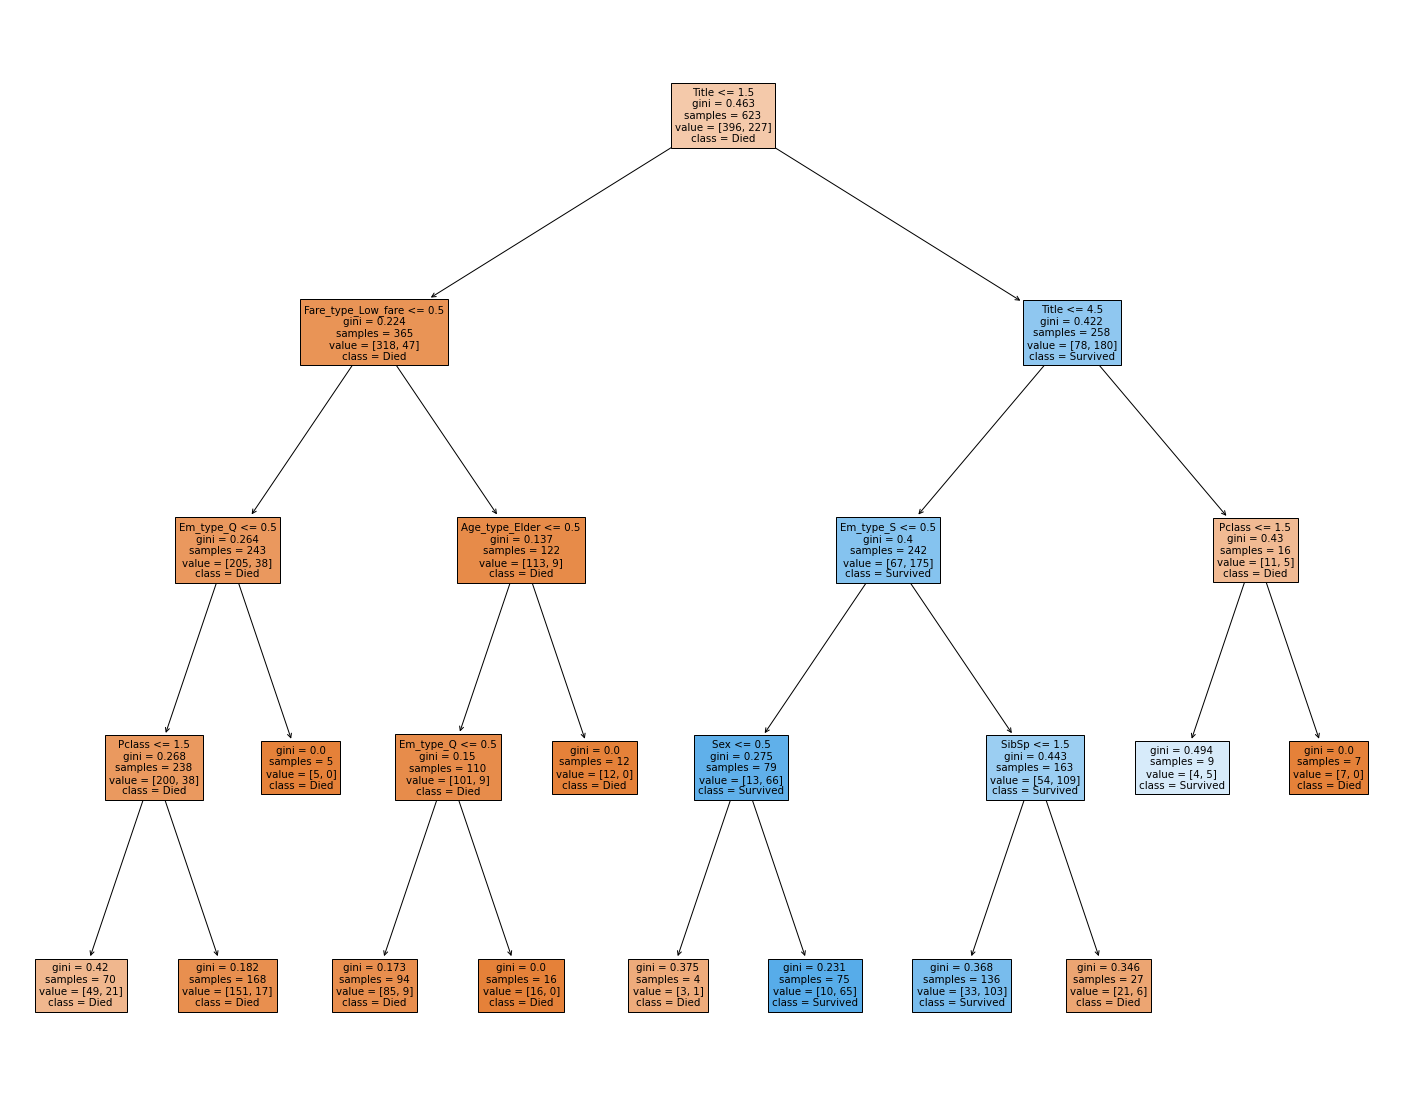

In [120]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
model= DecisionTreeClassifier(criterion='gini', min_samples_split=10,min_samples_leaf=1,max_features='auto', max_depth= 4)
t1=model.fit(X_train,y_train)
prediction_tree=model.predict(X_test)
print('The accuracy of the DecisionTree Classifier is',round(accuracy_score(prediction_tree,y_test)*100,2))
kfold = KFold(n_splits=5, random_state=1)
result_tree=cross_val_score(model,f,t,cv=5,scoring='accuracy')
print('The cross validated score for Decision Tree classifier is:',round(result_tree.mean()*100,2))
y_pred = cross_val_predict(model,f,t,cv=5)
fig = plt.figure(figsize =(25,20))
_ = tree.plot_tree(
    model,
    feature_names = list(training_data.drop(['Survived'], axis=1)),
    class_names = ['Died', 'Survived'],
    filled = True
)

In [104]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion='gini', n_estimators=1000,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=1,n_jobs=-1)
model.fit(X_train,y_train)
prediction_rm=model.predict(X_test)
print('The Accuracy of the model')
print('The accuracy of the Random Forest Classifier is', round(accuracy_score(prediction_rm,y_test)*100,2))
kfold = KFold(n_splits=5, random_state=1)
result_rm=cross_val_score(model,f,t,cv=5,scoring='accuracy')
print('The cross validated score for Random Forest Classifier is:',round(result_rm.mean()*100,2))
y_pred = cross_val_predict(model,f,t,cv=5)

The Accuracy of the model
The accuracy of the Random Forest Classifier is 78.73
The cross validated score for Random Forest Classifier is: 82.6
